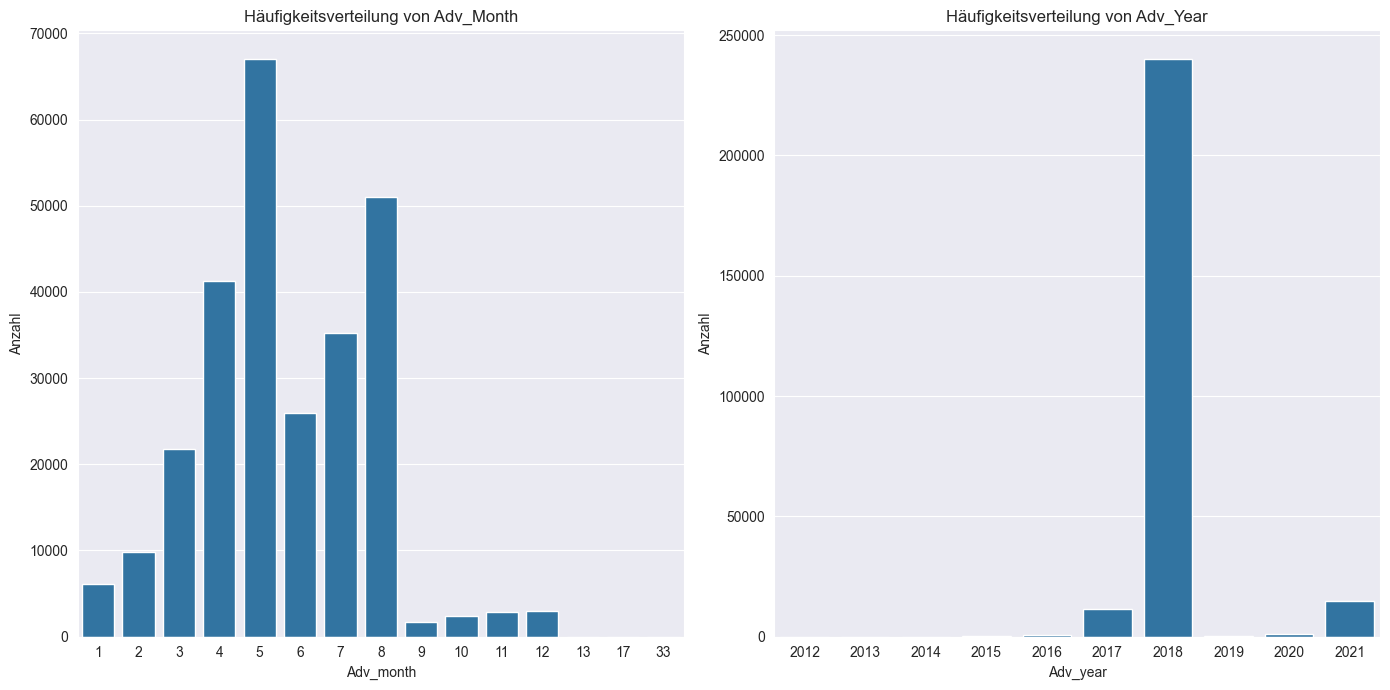

     Maker  Genmodel   Color  Reg_year Bodytype Runned_Miles Engin_size  \
0  Bentley    Arnage  Silver    2000.0   Saloon        60000       6.8L   
1  Bentley    Arnage    Grey    2002.0   Saloon        44000       6.8L   
2  Bentley    Arnage    Blue    2002.0   Saloon        55000       6.8L   
3  Bentley    Arnage   Green    2003.0   Saloon        14000       6.8L   
4  Bentley    Arnage    Grey    2003.0   Saloon        61652       6.8L   

     Gearbox Fuel_type    Price  Engine_power Annual_Tax  Wheelbase  Height  \
0  Automatic    Petrol  21500.0           NaN        NaN     3116.0  1515.0   
1  Automatic    Petrol  28750.0         450.0        315     3116.0  1515.0   
2  Automatic    Petrol  29999.0         400.0        315     3116.0  1515.0   
3  Automatic    Petrol  34948.0           NaN        NaN     3116.0  1515.0   
4  Automatic    Petrol  26555.0           NaN        NaN     3116.0  1515.0   

    Width  Length Average_mpg Top_speed  Seat_num  Door_num  
0  2125.0  5

In [18]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Laden des Datensatzes
file_path = 'Ad_table (extra).csv'
data = pd.read_csv(file_path)

# Entfernen der Identifikationsschlüssel
data_no_id = data.drop(columns=[' Genmodel_ID', 'Adv_ID'])

# Erstellung der Balkendiagramme für die Häufigkeitsverteilung von Adv_Month und Adv_Year
fig, axes = plt.subplots(1, 2, figsize=(14, 7))

# Balkendiagramm für Adv_Month
sns.countplot(ax=axes[0], x='Adv_month', data=data_no_id)
axes[0].set_title('Häufigkeitsverteilung von Adv_Month')
axes[0].set_xlabel('Adv_month')
axes[0].set_ylabel('Anzahl')

# Balkendiagramm für Adv_Year
sns.countplot(ax=axes[1], x='Adv_year', data=data_no_id)
axes[1].set_title('Häufigkeitsverteilung von Adv_Year')
axes[1].set_xlabel('Adv_year')
axes[1].set_ylabel('Anzahl')

# Anzeigen der Diagramme
plt.tight_layout()

# Speichern der Diagramme
plt.savefig('Adv_Month_Year_Distribution.png')

plt.show()

# Entfernen der Spalten Adv_month und Adv_year
data_no_id_dropped = data_no_id.drop(columns=['Adv_month', 'Adv_year'])

# Speichern der bereinigten Daten in eine neue CSV-Datei
data_no_id_dropped.to_csv('Ad_table_dropped.csv', index=False)

# Überprüfung der Daten nach dem Entfernen der Spalten
print(data_no_id_dropped.head())


In [19]:
import pandas as pd

# Laden des Datensatzes
file_path = 'Ad_table_dropped.csv'
data = pd.read_csv(file_path)

# Entfernen aller Zeilen mit fehlenden Werten
data_no_missing = data.dropna()

# Speichern des bereinigten Datensatzes in eine neue CSV-Datei
data_no_missing.to_csv('Ad_table_dropped_no_missing.csv', index=False)

# Überprüfung der Daten nach dem Entfernen der Zeilen mit fehlenden Werten
print(data_no_missing.shape)


(188182, 20)


In [22]:
import pandas as pd

# Laden des Datensatzes
file_path = 'Ad_table_dropped_no_missing.csv'
data_no_missing = pd.read_csv(file_path)

# Konvertieren von numerischen Merkmalen, die als 'object' gespeichert sind
data_no_missing['Runned_Miles'] = pd.to_numeric(data_no_missing['Runned_Miles'].apply(lambda x: x.replace(',', '') if isinstance(x, str) else x), errors='coerce')
data_no_missing['Engin_size'] = pd.to_numeric(data_no_missing['Engin_size'].apply(lambda x: x.replace('L', '').strip() if isinstance(x, str) else x), errors='coerce')
data_no_missing['Annual_Tax'] = pd.to_numeric(data_no_missing['Annual_Tax'].apply(lambda x: x.replace('£', '') if isinstance(x, str) else x), errors='coerce')
data_no_missing['Average_mpg'] = pd.to_numeric(data_no_missing['Average_mpg'].apply(lambda x: x.replace(' mpg', '') if isinstance(x, str) else x), errors='coerce')
data_no_missing['Top_speed'] = pd.to_numeric(data_no_missing['Top_speed'].apply(lambda x: x.replace(' mph', '') if isinstance(x, str) else x), errors='coerce')

data_no_missing = data.dropna()

# Überprüfung der umgewandelten Daten
print(data_no_missing.head())

# Speichern des bereinigten Datensatzes mit umgewandelten numerischen Werten in eine neue CSV-Datei
data_no_missing.to_csv('Ad_table_converted.csv', index=False)


      Maker  Genmodel   Color  Reg_year Bodytype Runned_Miles Engin_size  \
1   Bentley    Arnage    Grey    2002.0   Saloon        44000       6.8L   
2   Bentley    Arnage    Blue    2002.0   Saloon        55000       6.8L   
5   Bentley    Arnage    Blue    2002.0   Saloon        55000       6.8L   
11  Bentley    Arnage  Silver    2002.0   Saloon        52000       6.8L   
13  Bentley    Arnage    Blue    2002.0   Saloon        58000       6.8L   

      Gearbox Fuel_type    Price  Engine_power Annual_Tax  Wheelbase  Height  \
1   Automatic    Petrol  28750.0         450.0        315     3116.0  1515.0   
2   Automatic    Petrol  29999.0         400.0        315     3116.0  1515.0   
5   Automatic    Petrol  24950.0         450.0        315     3116.0  1515.0   
11  Automatic    Petrol  26990.0         450.0        315     3116.0  1515.0   
13  Automatic    Petrol  25950.0         450.0        315     3116.0  1515.0   

     Width  Length Average_mpg Top_speed  Seat_num  Door_num  

In [30]:
import pandas as pd

# Laden des Datensatzes
file_path = 'Ad_table_converted.csv'
data_converted = pd.read_csv(file_path)

# Entfernen von 'mpg' und 'mph' aus den entsprechenden Spalten
data_converted['Average_mpg'] = data_converted['Average_mpg'].apply(lambda x: x.replace(' mpg', '') if isinstance(x, str) else x)
data_converted['Top_speed'] = data_converted['Top_speed'].apply(lambda x: x.replace(' mph', '') if isinstance(x, str) else x)

# Entfernen von Symbolen aus der Annual_Tax-Spalte
data_converted['Annual_Tax'] = data_converted['Annual_Tax'].apply(lambda x: x.replace('£', '').replace('*', '').strip() if isinstance(x, str) else x)

# Umwandeln der relevanten Spalten in numerische Typen
data_converted['Runned_Miles'] = pd.to_numeric(data_converted['Runned_Miles'], errors='coerce')
data_converted['Price'] = pd.to_numeric(data_converted['Price'], errors='coerce')
data_converted['Annual_Tax'] = pd.to_numeric(data_converted['Annual_Tax'], errors='coerce')
data_converted['Average_mpg'] = pd.to_numeric(data_converted['Average_mpg'], errors='coerce')
data_converted['Top_speed'] = pd.to_numeric(data_converted['Top_speed'], errors='coerce')

# Umrechnungsfaktoren
mile_to_km = 1.60934
pound_to_euro = 1 / 0.85  # 1 Pfund ≈ 1 / 0.85 Euro
mpg_to_l_per_100km = 235.215
mph_to_kmh = 1.60934

# Umrechnung der Werte
data_converted['Runned_Miles'] = data_converted['Runned_Miles'] * mile_to_km
data_converted['Price'] = data_converted['Price'] * pound_to_euro
data_converted['Annual_Tax'] = data_converted['Annual_Tax'] * pound_to_euro
data_converted['Average_mpg'] = mpg_to_l_per_100km / data_converted['Average_mpg']
data_converted['Top_speed'] = data_converted['Top_speed'] * mph_to_kmh

# Umbenennen der Spalten
data_converted.rename(columns={
    'Runned_Miles': 'Mileage',
    'Average_mpg': 'Average_liter_per_100_kilometer',
    'Top_speed': 'Top_speed_kph'
}, inplace=True)

# Überprüfung der umgerechneten und umbenannten Daten
print(data_converted[['Mileage', 'Price', 'Annual_Tax', 'Average_liter_per_100_kilometer', 'Top_speed_kph']].head())

# Speichern des umgerechneten Datensatzes in eine neue CSV-Datei
data_converted.to_csv('Ad_table_converted_de.csv', index=False)


    Mileage         Price  Annual_Tax  Average_liter_per_100_kilometer  \
0  70810.96  33823.529412  370.588235                        17.168978   
1  88513.70  35292.941176  370.588235                        16.001020   
2  88513.70  29352.941176  370.588235                        17.168978   
3  83685.68  31752.941176  370.588235                        17.168978   
4  93341.72  30529.411765  370.588235                        17.168978   

   Top_speed_kph  
0      288.07186  
1      249.44770  
2      288.07186  
3      288.07186  
4      288.07186  


In [31]:
import pandas as pd

# Laden des Datensatzes
file_path = 'Ad_table_converted_de.csv'
data_converted = pd.read_csv(file_path)

# Ausgabe der Datentypen der Spalten
print(data_converted.dtypes)

Maker                               object
 Genmodel                           object
Color                               object
Reg_year                           float64
Bodytype                            object
Mileage                            float64
Engin_size                          object
Gearbox                             object
Fuel_type                           object
Price                              float64
Engine_power                       float64
Annual_Tax                         float64
Wheelbase                          float64
Height                             float64
Width                              float64
Length                             float64
Average_liter_per_100_kilometer    float64
Top_speed_kph                      float64
Seat_num                           float64
Door_num                           float64
dtype: object


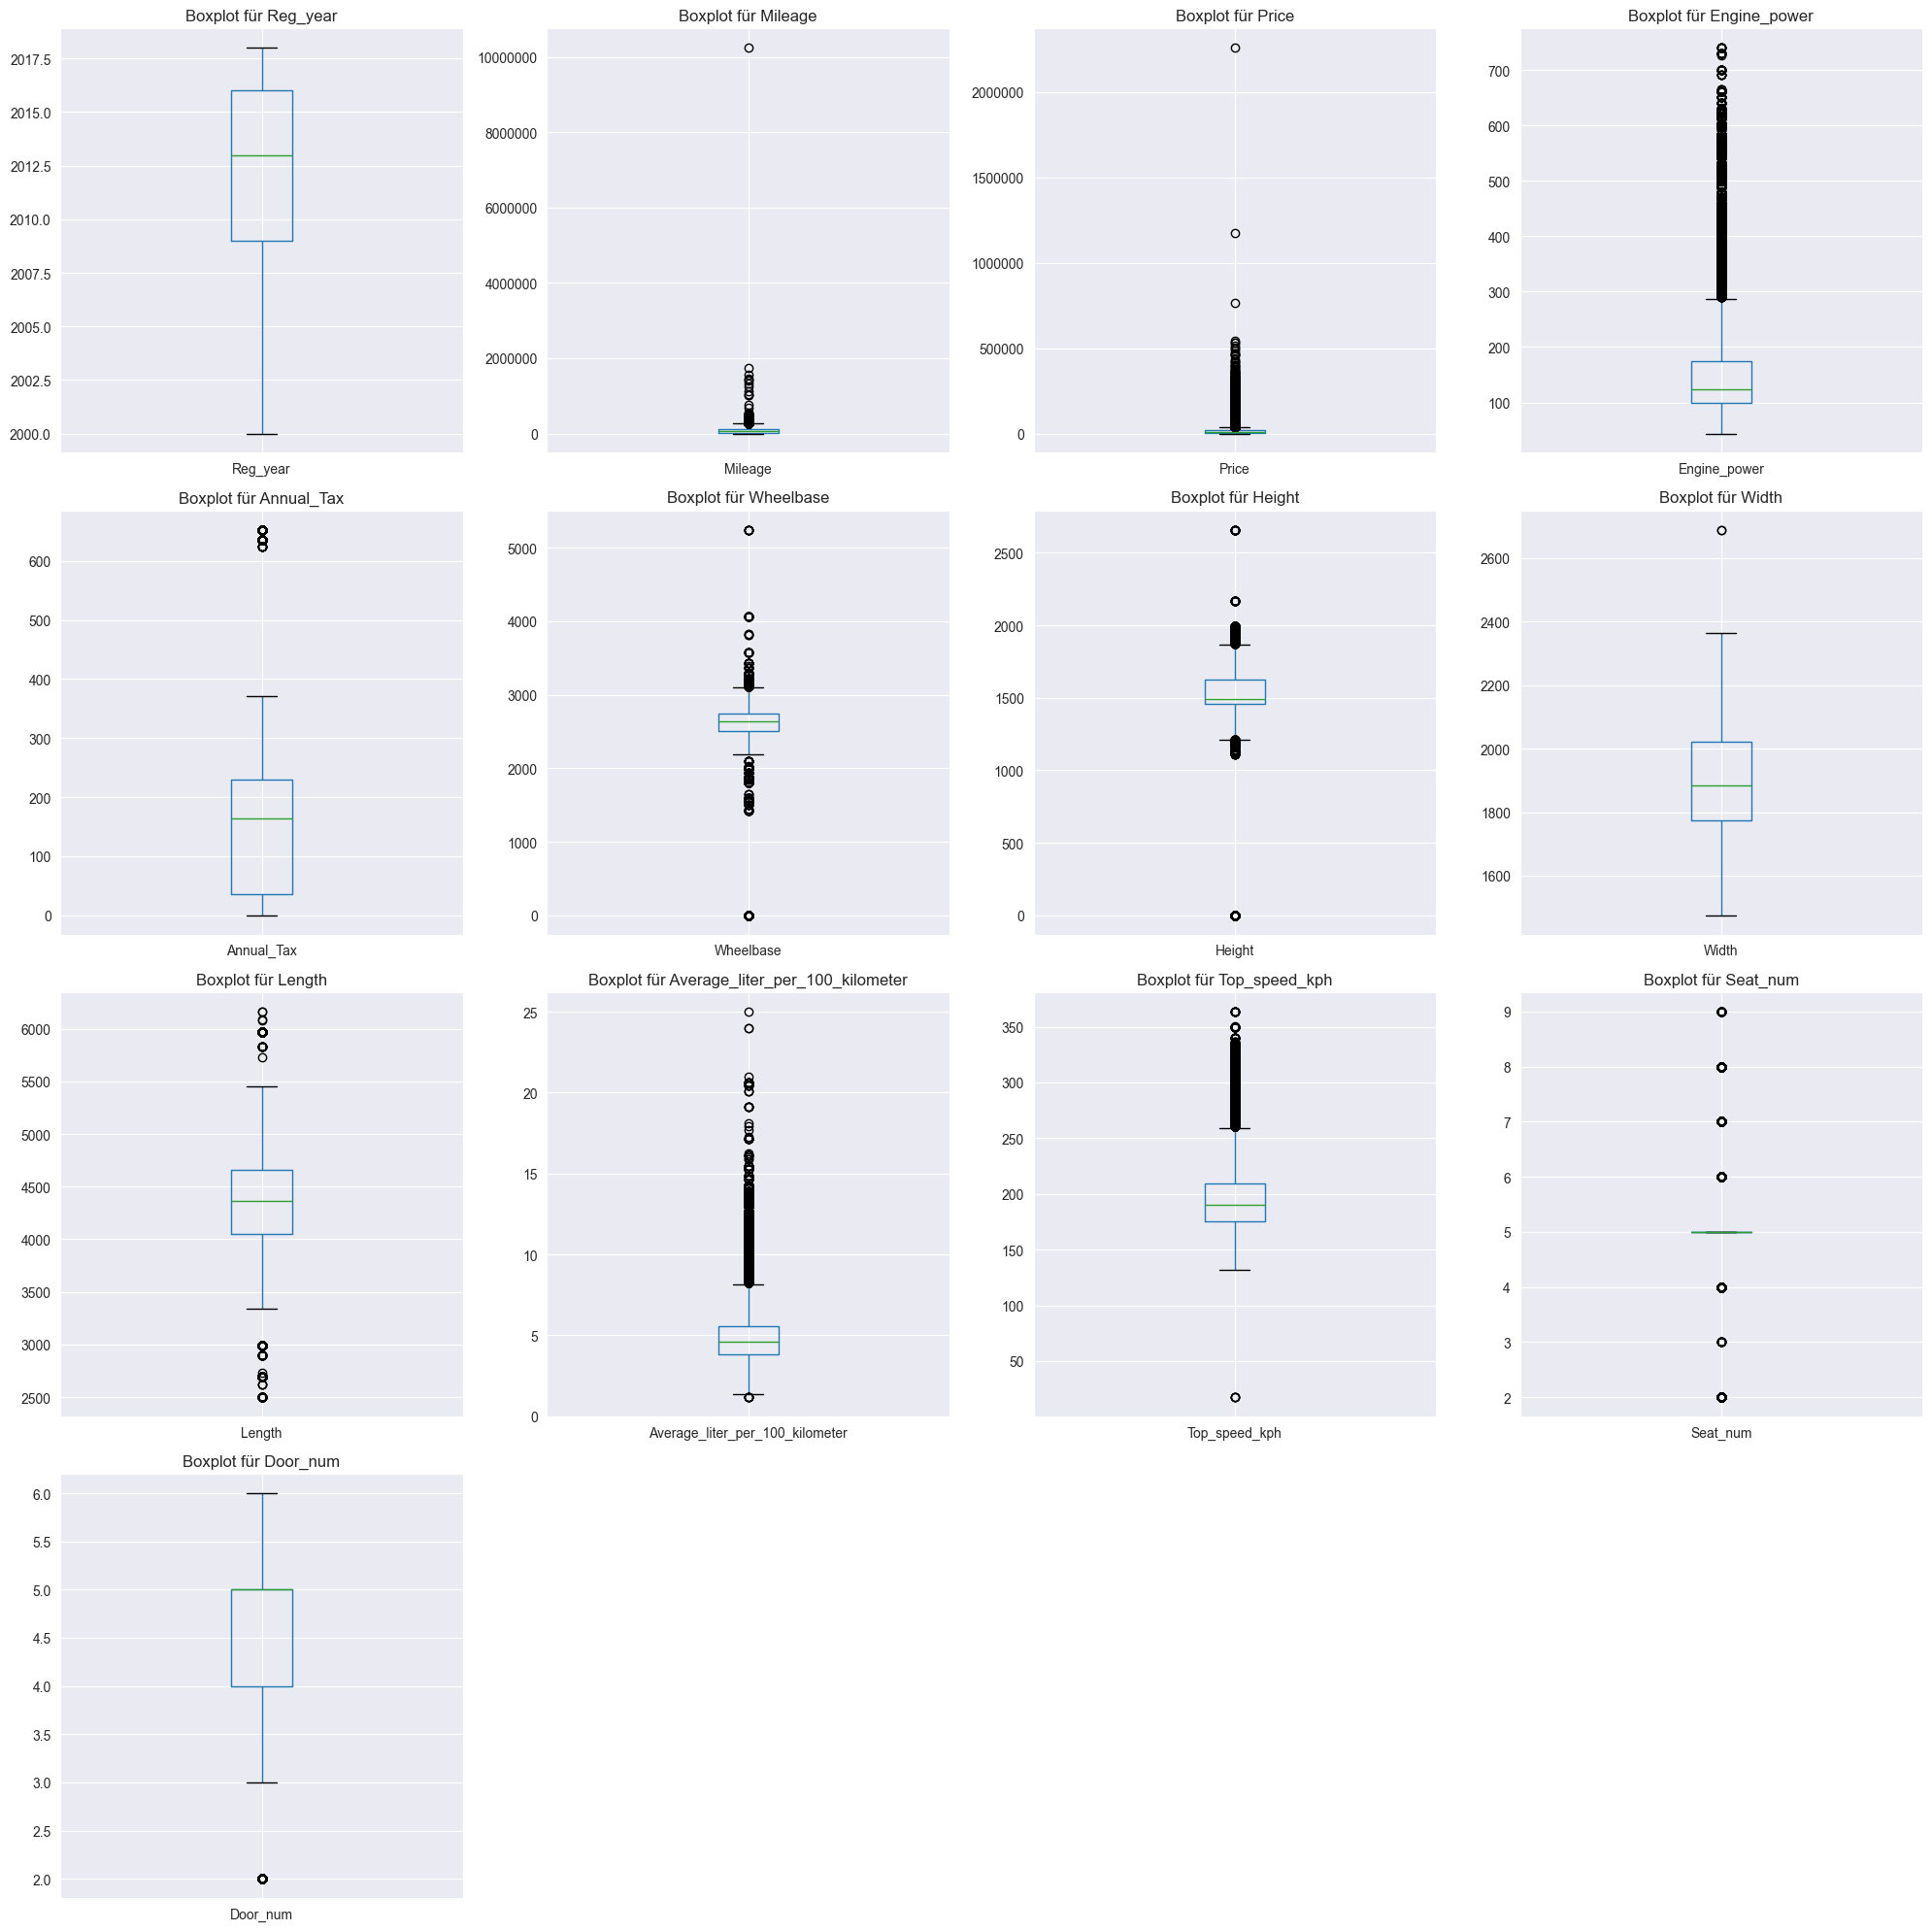

Die Boxplot-Matrix wurde als Datei unter boxplot_matrix.png gespeichert.


In [34]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Laden des aktualisierten Datensatzes
file_path = 'Ad_table_converted_de.csv'
data_converted = pd.read_csv(file_path)

numerical_columns = data_converted.select_dtypes(include=['float64', 'int64']).columns

# Anzahl der Spalten für die Matrix
num_cols = 4
num_rows = len(numerical_columns) // num_cols + (len(numerical_columns) % num_cols > 0)

fig, axes = plt.subplots(num_rows, num_cols, figsize=(20, num_rows * 5))
axes = axes.flatten()

for i, column in enumerate(numerical_columns):
    data_converted.boxplot(column=[column], ax=axes[i])
    axes[i].ticklabel_format(style='plain', axis='y')  # Deaktivieren der wissenschaftlichen Notation
    axes[i].set_title(f'Boxplot für {column}')

# Entfernen leerer Subplots
for i in range(len(numerical_columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()

# Speichern der Boxplot-Matrix in eine Datei
output_file = 'boxplot_matrix.png'
plt.savefig(output_file)

plt.show()

print(f'Die Boxplot-Matrix wurde als Datei unter {output_file} gespeichert.')

In [39]:
import pandas as pd

# Laden des aktualisierten Datensatzes
file_path = 'Ad_table_converted_de.csv'
data_converted = pd.read_csv(file_path)

# Filtern der Datensätze mit Mileage über 10 Millionen
high_mileage_cars = data_converted[data_converted['Mileage'] > 10_000_000]

# Ausgabe der gefilterten Datensätze
print(high_mileage_cars)

             Maker  Genmodel  Color  Reg_year   Bodytype     Mileage  \
171017  Volkswagen      Golf  Black   2007.00  Hatchback 10240780.81   

       Engin_size Gearbox Fuel_type   Price  Engine_power  Annual_Tax  \
171017       1.6L  Manual    Petrol 2817.65        113.00      229.41   

        Wheelbase  Height   Width  Length  Average_liter_per_100_kilometer  \
171017    2578.00 1479.00 1759.00 4204.00                             5.57   

        Top_speed_kph  Seat_num  Door_num  
171017         191.51      5.00      5.00  


In [40]:
import pandas as pd

# Laden des aktualisierten Datensatzes
file_path = 'Ad_table_converted_de.csv'
data_converted = pd.read_csv(file_path)

# Filtern der Datensätze mit Price über 650.000
high_price_cars = data_converted[data_converted['Price'] > 650_000]

# Ausgabe der gefilterten Datensätze
print(high_price_cars)

          Maker  Genmodel   Color  Reg_year Bodytype  Mileage Engin_size  \
10064   Ferrari       599     Red   2011.00    Coupe  7988.76       6.0L   
75955   McLaren        P1  Yellow   2016.00    Coupe   243.01       3.8L   
120750     Audi        R8    Grey   2016.00    Coupe  8046.70       5.2L   

          Gearbox                        Fuel_type      Price  Engine_power  \
10064   Automatic                           Petrol  764705.88        661.00   
75955   Automatic  Hybrid  Petrol/Electric Plug-in 2258823.53        727.00   
120750  Automatic                           Petrol 1176469.41        602.00   

        Annual_Tax  Wheelbase  Height   Width  Length  \
10064       652.94    2750.00 1336.00 1962.00 4665.00   
75955       329.41    2670.00 1118.00 1946.00 4588.00   
120750      652.94    2650.00 1240.00 2037.00 4426.00   

        Average_liter_per_100_kilometer  Top_speed_kph  Seat_num  Door_num  
10064                             14.61         334.74      2.00      2.

In [41]:
import pandas as pd

# Laden des aktualisierten Datensatzes
file_path = 'Ad_table_converted_de.csv'
data_converted = pd.read_csv(file_path)

# Filtern der Datensätze mit Wheelbase kleiner als 10
small_wheelbase_cars = data_converted[data_converted['Wheelbase'] < 10]

# Ausgabe der gefilterten Datensätze
print(small_wheelbase_cars)

# Optional: Speichern der gefilterten Datensätze in eine neue CSV-Datei
small_wheelbase_cars.to_csv('small_wheelbase_cars.csv', index=False)


             Maker         Genmodel   Color  Reg_year   Bodytype   Mileage  \
3515       Citroen         Berlingo  Silver   2015.00  Combi Van  49166.95   
10595         Fiat            Doblo   White   2015.00  Combi Van 239791.66   
10616         Fiat            Doblo   White   2017.00  Combi Van   3701.48   
10688         Fiat         Fullback    Blue   2017.00     Pickup   7100.41   
10689         Fiat         Fullback    Blue   2017.00     Pickup  16093.40   
...            ...              ...     ...       ...        ...       ...   
181892  Volkswagen  Caddy Maxi Life    Blue   2010.00        MPV 151277.96   
181893  Volkswagen  Caddy Maxi Life    Grey   2010.00        MPV  94951.06   
181894  Volkswagen  Caddy Maxi Life    Grey   2012.00        MPV 157213.21   
181895  Volkswagen  Caddy Maxi Life     Red   2012.00        MPV  61637.72   
181896  Volkswagen  Caddy Maxi Life    Grey   2008.00        MPV 170590.04   

       Engin_size    Gearbox Fuel_type    Price  Engine_power  

In [42]:
import pandas as pd

# Laden des aktualisierten Datensatzes
file_path = 'Ad_table_converted_de.csv'
data_converted = pd.read_csv(file_path)

# Filtern der Datensätze mit Annual_Tax über 400
high_annual_tax_cars = data_converted[data_converted['Annual_Tax'] > 400]

# Ausgabe der gefilterten Datensätze
print(high_annual_tax_cars)

# Optional: Speichern der gefilterten Datensätze in eine neue CSV-Datei
high_annual_tax_cars.to_csv('high_annual_tax_cars.csv', index=False)


          Maker  Genmodel   Color  Reg_year Bodytype   Mileage Engin_size  \
5       Bentley  Bentayga    Grey   2017.00      SUV  17657.68       6.0L   
8       Bentley  Bentayga    Blue   2016.00      SUV  26595.95       6.0L   
9       Bentley  Bentayga   White   2016.00      SUV  26071.31       6.0L   
10      Bentley  Bentayga    Grey   2016.00      SUV   9656.04       6.0L   
12      Bentley  Bentayga    Blue   2016.00      SUV   9495.11       6.0L   
...         ...       ...     ...       ...      ...       ...        ...   
186645    Volvo       S80  Silver   2007.00   Saloon 177027.40       2.5L   
186646    Volvo       S80    Blue   2007.00   Saloon 119252.09       2.5L   
186665    Volvo       S80  Silver   2008.00   Saloon 138000.90       3.2L   
187784    Volvo       V50  Silver   2007.00   Estate 149650.92       2.5L   
188141    Volvo       V50    Blue   2009.00   Estate  57125.13       2.5L   

          Gearbox Fuel_type     Price  Engine_power  Annual_Tax  Wheelbase 

In [43]:
# Laden des aktualisierten Datensatzes
file_path = 'Ad_table_converted_de.csv'
data_converted = pd.read_csv(file_path)

# Entfernen der Datensätze mit Mileage über 10 Millionen
data_filtered = data_converted[data_converted['Mileage'] <= 10_000_000]

# Entfernen der Datensätze mit Wheelbase gleich 0
data_filtered = data_filtered[data_filtered['Wheelbase'] != 0]

# Entfernen der Datensätze mit Height gleich 0
data_filtered = data_filtered[data_filtered['Height'] != 0]

# Speichern des gefilterten Datensatzes in eine neue CSV-Datei
filtered_file_path = 'Ad_table_filtered.csv'
data_filtered.to_csv(filtered_file_path, index=False)
print(data_filtered.shape)



(184225, 20)
     Maker  Genmodel   Color  Reg_year Bodytype  Mileage Engin_size  \
0  Bentley    Arnage    Grey   2002.00   Saloon 70810.96       6.8L   
1  Bentley    Arnage    Blue   2002.00   Saloon 88513.70       6.8L   
2  Bentley    Arnage    Blue   2002.00   Saloon 88513.70       6.8L   
3  Bentley    Arnage  Silver   2002.00   Saloon 83685.68       6.8L   
4  Bentley    Arnage    Blue   2002.00   Saloon 93341.72       6.8L   

     Gearbox Fuel_type    Price  Engine_power  Annual_Tax  Wheelbase  Height  \
0  Automatic    Petrol 33823.53        450.00      370.59    3116.00 1515.00   
1  Automatic    Petrol 35292.94        400.00      370.59    3116.00 1515.00   
2  Automatic    Petrol 29352.94        450.00      370.59    3116.00 1515.00   
3  Automatic    Petrol 31752.94        450.00      370.59    3116.00 1515.00   
4  Automatic    Petrol 30529.41        450.00      370.59    3116.00 1515.00   

    Width  Length  Average_liter_per_100_kilometer  Top_speed_kph  Seat_num  \


In [44]:
import pandas as pd

# Laden des gefilterten Datensatzes
file_path = 'Ad_table_filtered.csv'
data_filtered = pd.read_csv(file_path)

# Hinzufügen der neuen Spalte "New_car"
data_filtered['New_car'] = data_filtered['Mileage'].apply(lambda x: 'Yes' if x <= 1000 else 'No')

# Überprüfung der neuen Spalte
print(data_filtered[['Mileage', 'New_car']].head())

# Speichern des aktualisierten Datensatzes in eine neue CSV-Datei
data_filtered.to_csv('Ad_table_with_new_car.csv', index=False)


   Mileage New_car
0 70810.96      No
1 88513.70      No
2 88513.70      No
3 83685.68      No
4 93341.72      No


Durchschnittspreise für New_car Yes und No:
  New_car    Price
0      No 14392.91
1     Yes 29710.35


C:\Users\Marce\AppData\Local\Temp\ipykernel_1476\712596174.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='New_car', y='Price', data=average_prices, palette='viridis')


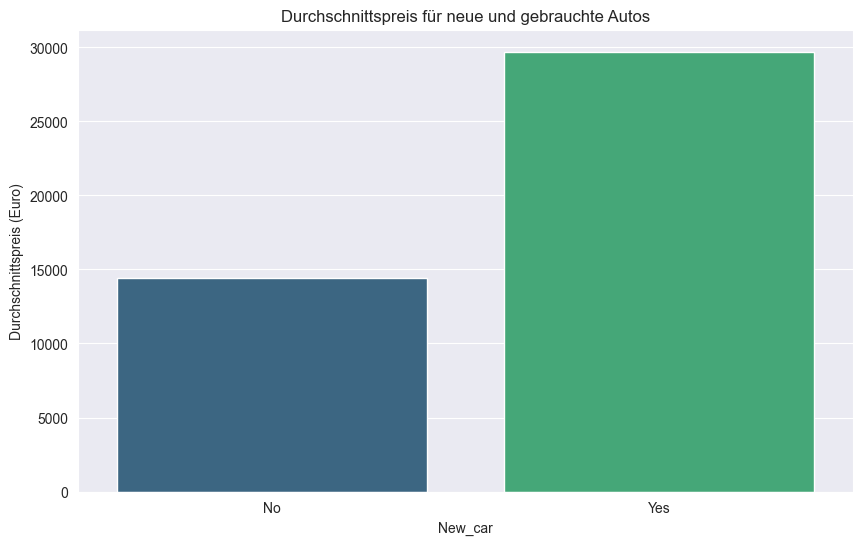

In [50]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Laden des Datensatzes mit der hinzugefügten Spalte "New_car"
file_path = 'Ad_table_with_new_car.csv'
data_filtered = pd.read_csv(file_path)

# Berechnung des Durchschnittspreises für New_car Yes und No
average_prices = data_filtered.groupby('New_car')['Price'].mean().reset_index()

# Anzeige der konkreten Durchschnittspreise
print("Durchschnittspreise für New_car Yes und No:")
print(average_prices)

# Erstellung des Balkendiagramms
plt.figure(figsize=(10, 6))
sns.barplot(x='New_car', y='Price', data=average_prices, palette='viridis')
plt.title('Durchschnittspreis für neue und gebrauchte Autos')
plt.xlabel('New_car')
plt.ylabel('Durchschnittspreis (Euro)')

# Speichern des Diagramms
plt.savefig('average_price_new_car.png')

# Anzeigen des Diagramms
plt.show()


Durchschnittspreise pro Hersteller:
                         Maker     Price
40                     Perodua    929.41
11                      Daewoo   1035.73
43                      Proton   1433.00
46                       Rover   1764.36
21                       Isuzu   2111.76
12                    Daihatsu   3225.11
49                        Saab   3247.52
6                    Chevrolet   3626.78
7                     Chrysler   4914.38
13                       Dodge   4959.29
15                        Fiat   6329.42
31                        MINI   6925.88
41                     Peugeot   6952.10
55                    Vauxhall   7506.68
50                       Smart   7814.23
8                      Citroen   8107.68
44                     Renault   8412.42
30                          MG   8416.02
16                        Ford   8687.63
47                        SEAT   9488.76
53                      Suzuki   9517.96
39                      Nissan   9604.38
10                   

C:\Users\Marce\AppData\Local\Temp\ipykernel_1476\120366394.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Maker', y='Price', data=average_prices_per_maker, palette='viridis')


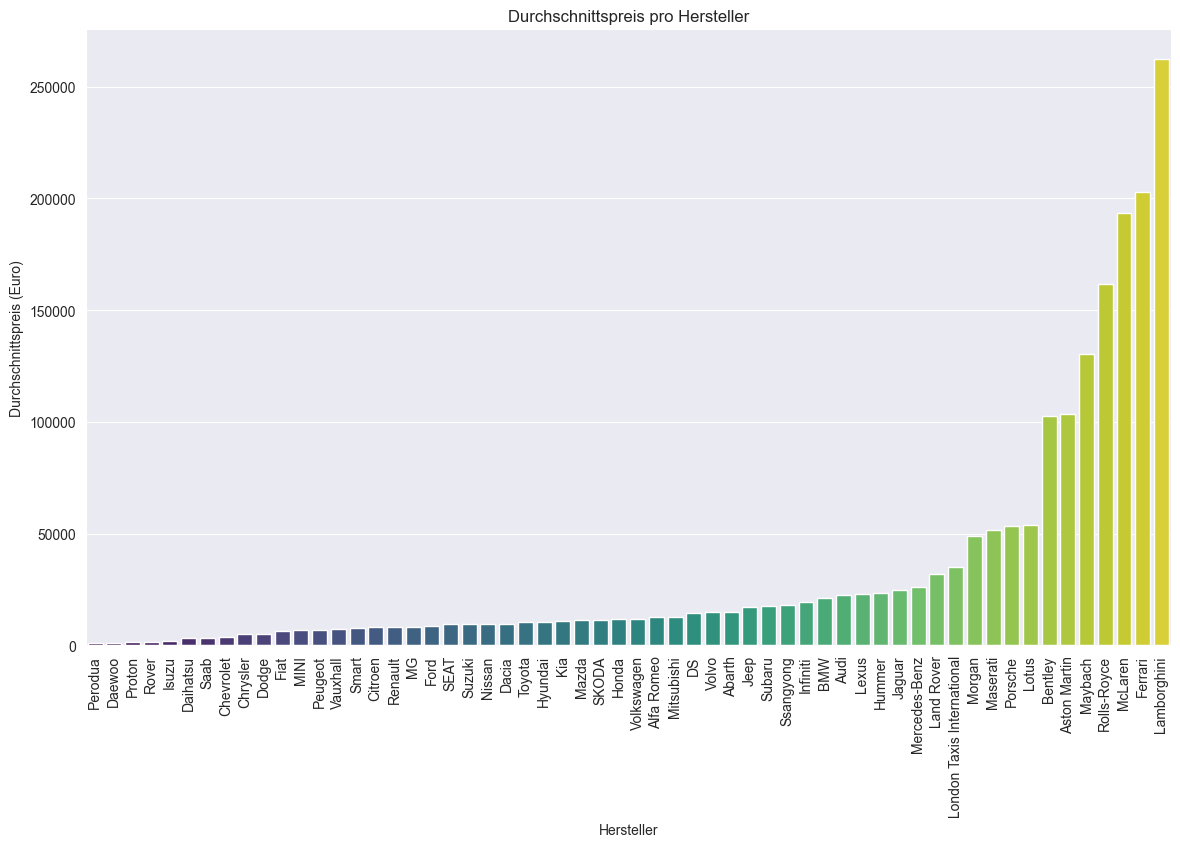

In [58]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Laden des Datensatzes mit der hinzugefügten Spalte "New_car"
file_path = 'Ad_table_with_new_car.csv'
data_filtered = pd.read_csv(file_path)

# Berechnung des Durchschnittspreises pro Hersteller
average_prices_per_maker = data_filtered.groupby('Maker')['Price'].mean().reset_index()

# Sortieren der Hersteller nach Durchschnittspreis
average_prices_per_maker = average_prices_per_maker.sort_values(by='Price')

# Anzeige der konkreten Durchschnittspreise pro Hersteller
print("Durchschnittspreise pro Hersteller:")
print(average_prices_per_maker)

# Erstellung des Balkendiagramms
plt.figure(figsize=(14, 8))
sns.barplot(x='Maker', y='Price', data=average_prices_per_maker, palette='viridis')
plt.title('Durchschnittspreis pro Hersteller')
plt.xlabel('Hersteller')
plt.ylabel('Durchschnittspreis (Euro)')
plt.xticks(rotation=90)

# Deaktivieren der wissenschaftlichen Notation auf der y-Achse
plt.ticklabel_format(style='plain', axis='y')

# Speichern des Diagramms
plt.savefig('average_price_per_maker.png')

# Anzeigen des Diagramms
plt.show()


Durchschnittspreise pro Hersteller mit Kategorie:
                         Maker     Price Category
40                     Perodua    929.41    Small
11                      Daewoo   1035.73    Small
43                      Proton   1433.00    Small
46                       Rover   1764.36    Small
21                       Isuzu   2111.76    Small
12                    Daihatsu   3225.11    Small
49                        Saab   3247.52    Small
6                    Chevrolet   3626.78    Small
7                     Chrysler   4914.38    Small
13                       Dodge   4959.29    Small
15                        Fiat   6329.42    Small
31                        MINI   6925.88    Small
41                     Peugeot   6952.10    Small
55                    Vauxhall   7506.68    Small
50                       Smart   7814.23    Small
8                      Citroen   8107.68    Small
44                     Renault   8412.42    Small
30                          MG   8416.02    Small


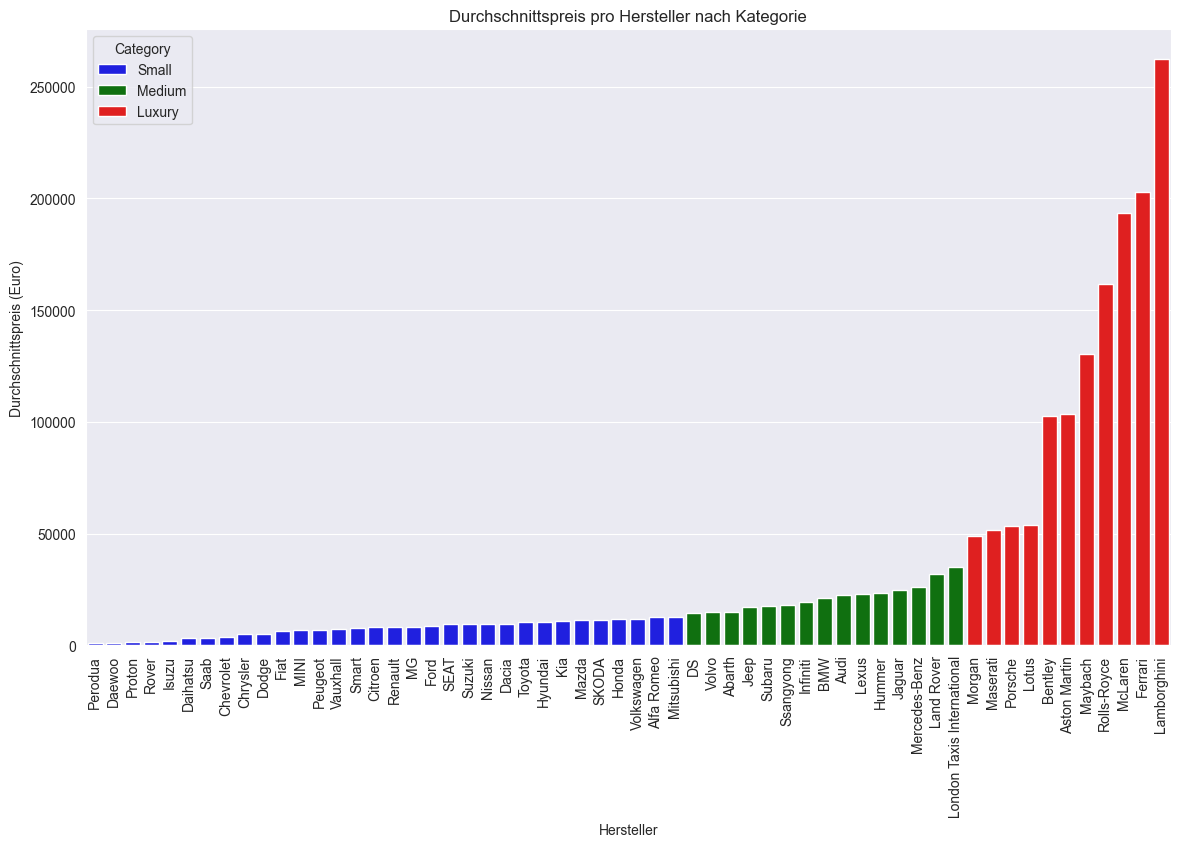

C:\Users\Marce\AppData\Local\Temp\ipykernel_1476\1165403880.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Maker', y='Price', data=subset, palette=[palette[category]])
C:\Users\Marce\AppData\Local\Temp\ipykernel_1476\1165403880.py:60: UserWarning: 
The palette list has fewer values (1) than needed (32) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Maker', y='Price', data=subset, palette=[palette[category]])


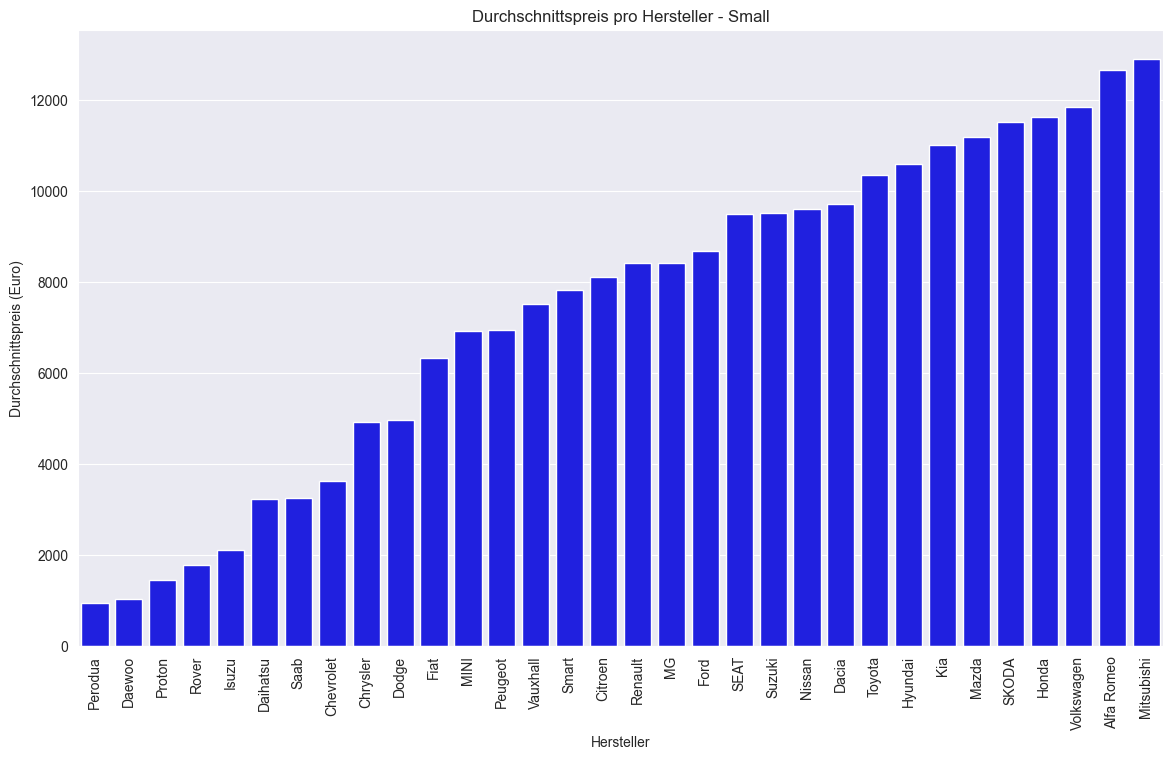

C:\Users\Marce\AppData\Local\Temp\ipykernel_1476\1165403880.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Maker', y='Price', data=subset, palette=[palette[category]])
C:\Users\Marce\AppData\Local\Temp\ipykernel_1476\1165403880.py:60: UserWarning: 
The palette list has fewer values (1) than needed (15) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Maker', y='Price', data=subset, palette=[palette[category]])


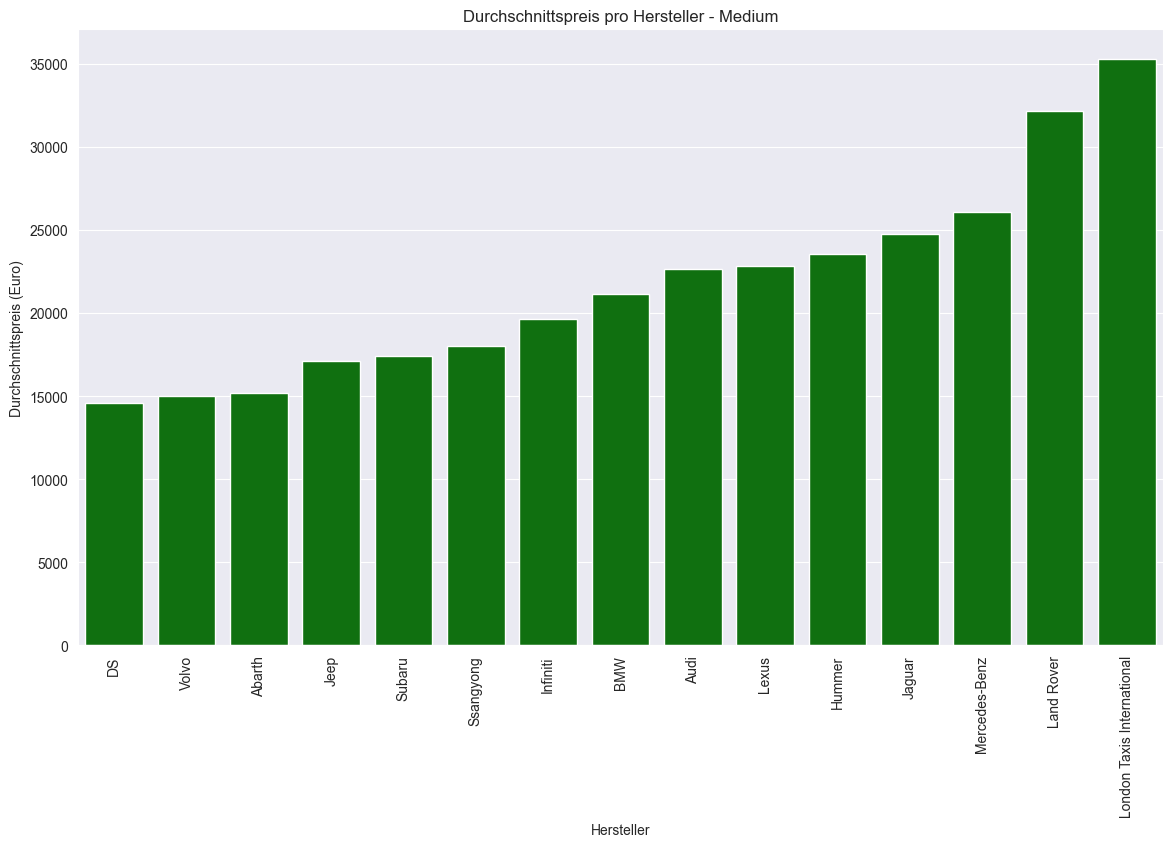

C:\Users\Marce\AppData\Local\Temp\ipykernel_1476\1165403880.py:60: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Maker', y='Price', data=subset, palette=[palette[category]])
C:\Users\Marce\AppData\Local\Temp\ipykernel_1476\1165403880.py:60: UserWarning: 
The palette list has fewer values (1) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Maker', y='Price', data=subset, palette=[palette[category]])


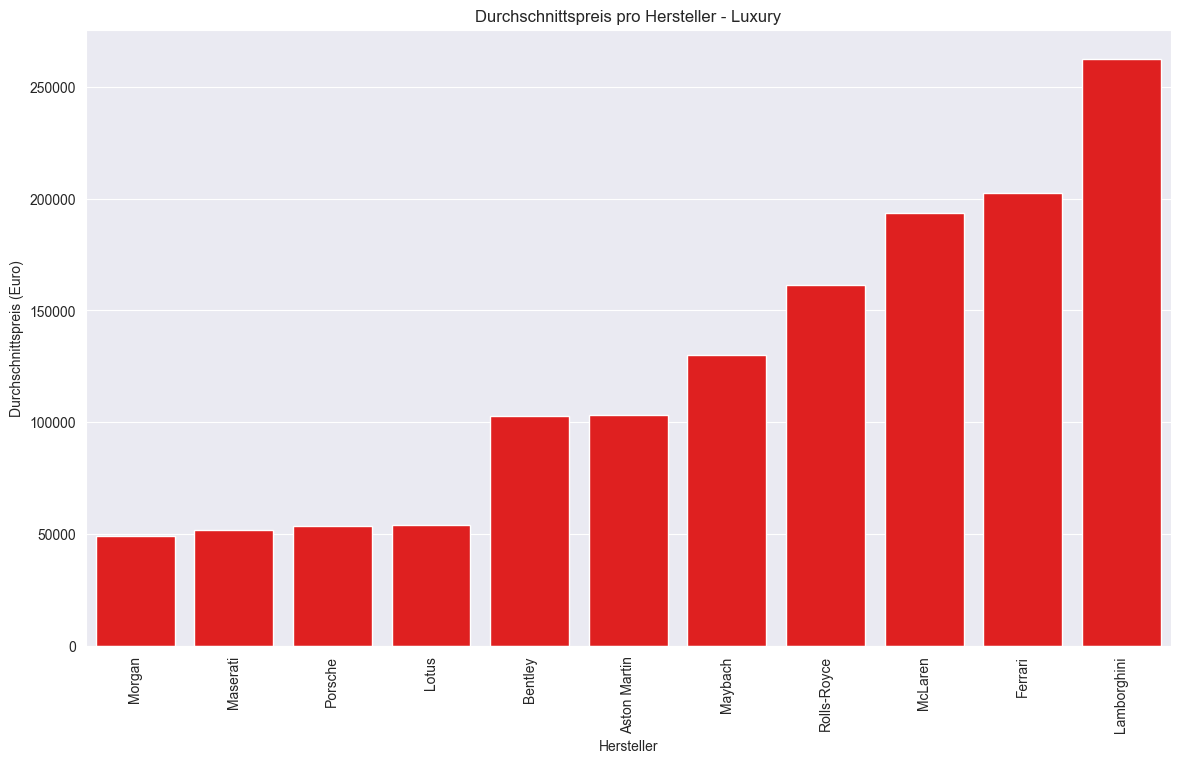

In [63]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Laden des Datensatzes mit der hinzugefügten Spalte "New_car"
file_path = 'Ad_table_with_new_car.csv'
data_filtered = pd.read_csv(file_path)

# Berechnung des Durchschnittspreises pro Hersteller
average_prices_per_maker = data_filtered.groupby('Maker')['Price'].mean().reset_index()

# Sortieren der Hersteller nach Durchschnittspreis
average_prices_per_maker = average_prices_per_maker.sort_values(by='Price')

# Grenzwerte basierend auf Morgan und DS
luxury_threshold = average_prices_per_maker[average_prices_per_maker['Maker'] == 'Morgan']['Price'].values[0]
small_threshold = average_prices_per_maker[average_prices_per_maker['Maker'] == 'DS']['Price'].values[0]

# Einteilung der Hersteller in Kategorien basierend auf den Grenzwerten
def categorize_maker(price):
    if price >= luxury_threshold:
        return 'Luxury'
    elif price < small_threshold:
        return 'Small'
    else:
        return 'Medium'

average_prices_per_maker['Category'] = average_prices_per_maker['Price'].apply(categorize_maker)

# Anzeige der konkreten Durchschnittspreise pro Hersteller mit Kategorie
print("Durchschnittspreise pro Hersteller mit Kategorie:")
print(average_prices_per_maker)

# Farben für die Kategorien
palette = {'Small': 'blue', 'Medium': 'green', 'Luxury': 'red'}

# Erstellung des Balkendiagramms mit eingefärbten Kategorien
plt.figure(figsize=(14, 8))
sns.barplot(x='Maker', y='Price', hue='Category', data=average_prices_per_maker, dodge=False, palette=palette)
plt.title('Durchschnittspreis pro Hersteller nach Kategorie')
plt.xlabel('Hersteller')
plt.ylabel('Durchschnittspreis (Euro)')
plt.xticks(rotation=90)
plt.legend(title='Category')

# Deaktivieren der wissenschaftlichen Notation auf der y-Achse
plt.ticklabel_format(style='plain', axis='y')

# Speichern des Diagramms
plt.savefig('average_price_per_maker_colored.png')

# Anzeigen des Diagramms
plt.show()

# Erstellung der separaten Balkendiagramme für jede Gruppe
categories = ['Small', 'Medium', 'Luxury']
for category in categories:
    plt.figure(figsize=(14, 8))
    subset = average_prices_per_maker[average_prices_per_maker['Category'] == category]
    sns.barplot(x='Maker', y='Price', data=subset, palette=[palette[category]])
    plt.title(f'Durchschnittspreis pro Hersteller - {category}')
    plt.xlabel('Hersteller')
    plt.ylabel('Durchschnittspreis (Euro)')
    plt.xticks(rotation=90)
    plt.ticklabel_format(style='plain', axis='y')

    # Speichern des Diagramms
    plt.savefig(f'average_price_per_maker_{category}.png')


    
    # Anzeigen des Diagramms
    plt.show()



In [64]:
# Laden des finalen Datensatzes
file_path = 'Ad_table_with_groups_final.csv'
data_final_prepared = pd.read_csv(file_path)

print(data_final_prepared.shape)

(184225, 21)


Durchschnittspreise pro Hersteller mit Kategorie:
                         Maker     Price Category
40                     Perodua    929.41    Small
11                      Daewoo   1035.73    Small
43                      Proton   1433.00    Small
46                       Rover   1764.36    Small
21                       Isuzu   2111.76    Small
12                    Daihatsu   3225.11    Small
49                        Saab   3247.52    Small
6                    Chevrolet   3626.78    Small
7                     Chrysler   4914.38    Small
13                       Dodge   4959.29    Small
15                        Fiat   6329.42    Small
31                        MINI   6925.88    Small
41                     Peugeot   6952.10    Small
55                    Vauxhall   7506.68    Small
50                       Smart   7814.23    Small
8                      Citroen   8107.68    Small
44                     Renault   8412.42    Small
30                          MG   8416.02    Small


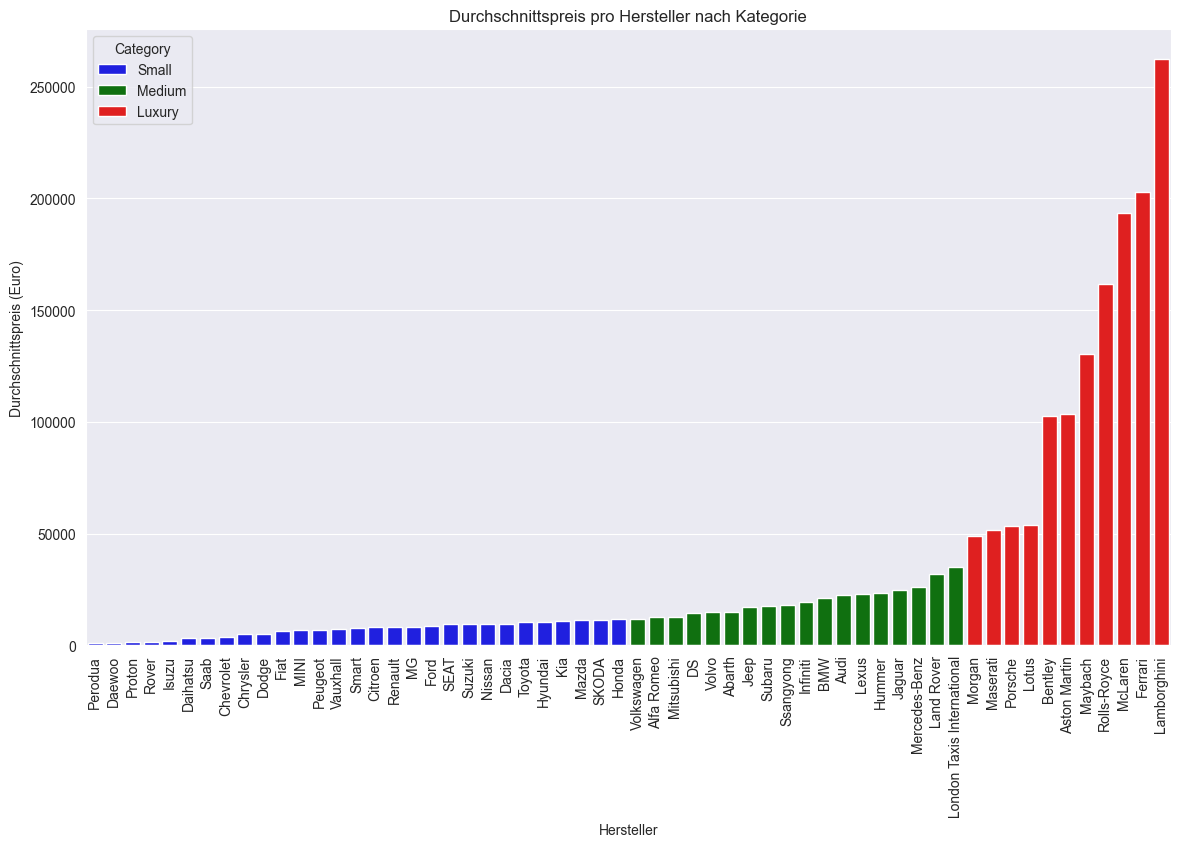

C:\Users\Marce\AppData\Local\Temp\ipykernel_1476\3436282415.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Maker', y='Price', data=subset_sorted, palette=[palette[category]])
C:\Users\Marce\AppData\Local\Temp\ipykernel_1476\3436282415.py:67: UserWarning: 
The palette list has fewer values (1) than needed (29) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Maker', y='Price', data=subset_sorted, palette=[palette[category]])


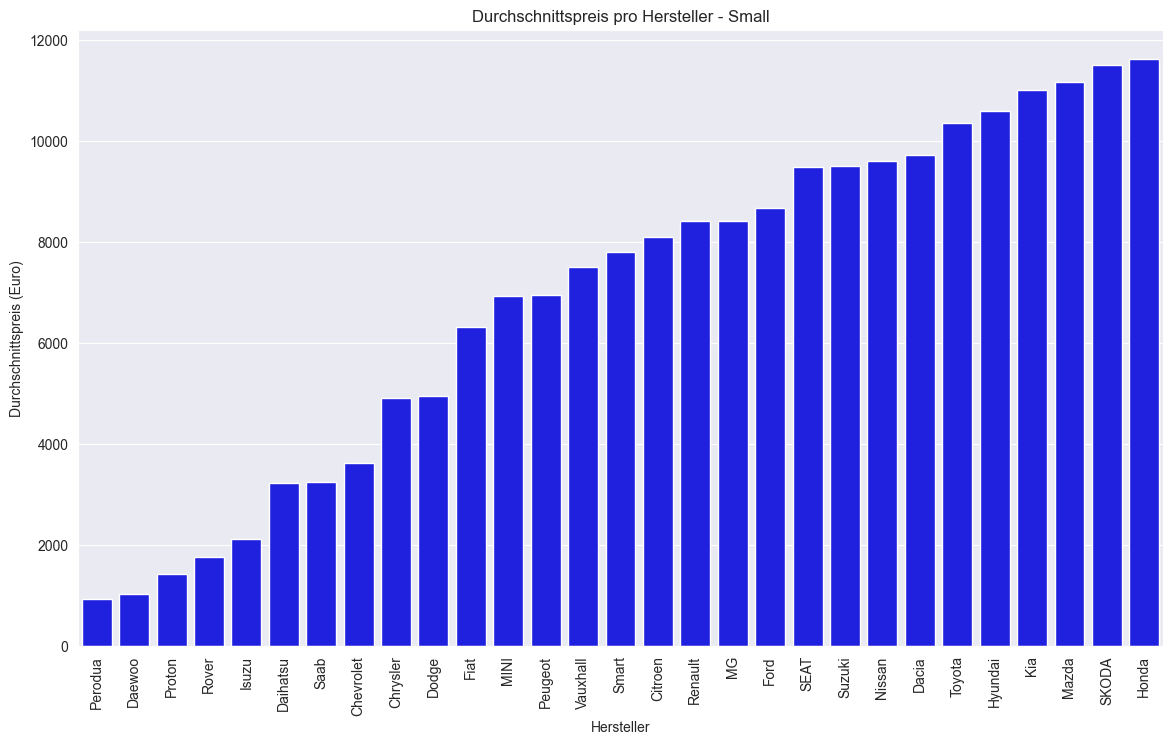

C:\Users\Marce\AppData\Local\Temp\ipykernel_1476\3436282415.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Maker', y='Price', data=subset_sorted, palette=[palette[category]])
C:\Users\Marce\AppData\Local\Temp\ipykernel_1476\3436282415.py:67: UserWarning: 
The palette list has fewer values (1) than needed (18) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Maker', y='Price', data=subset_sorted, palette=[palette[category]])


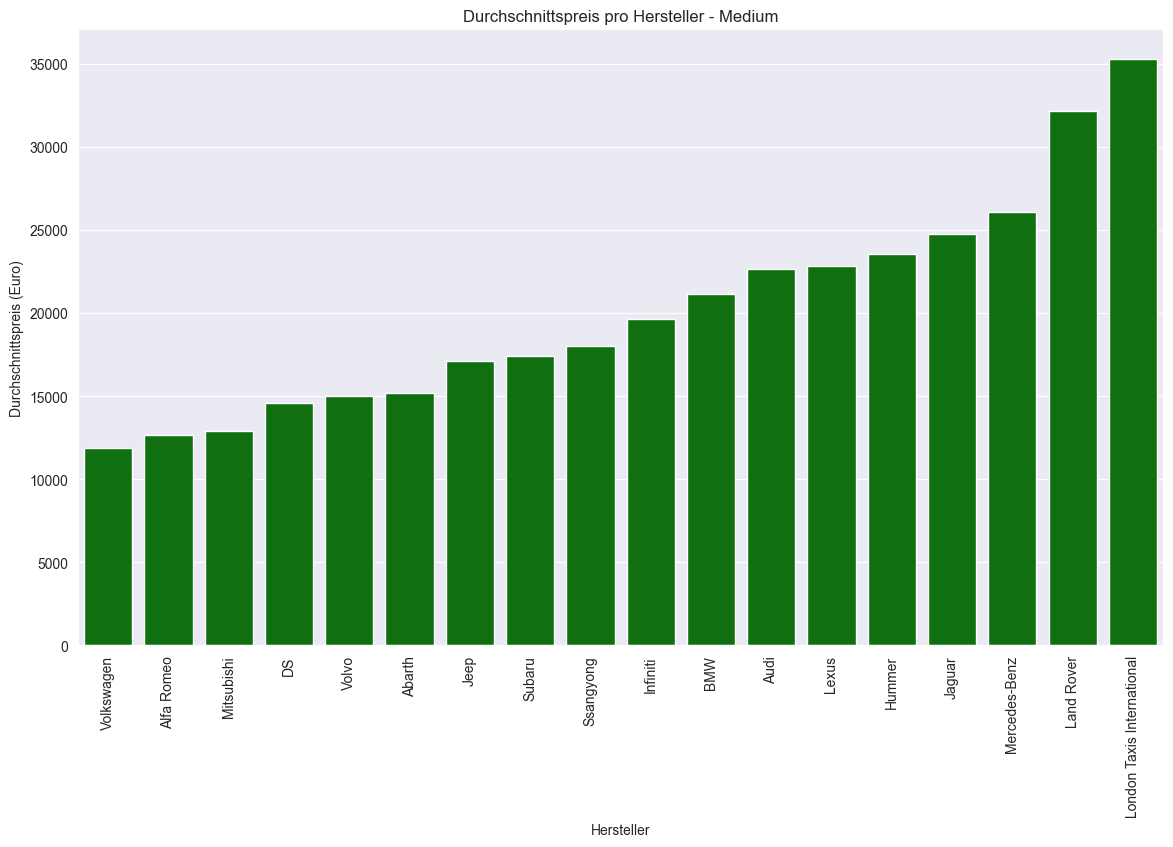

C:\Users\Marce\AppData\Local\Temp\ipykernel_1476\3436282415.py:67: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Maker', y='Price', data=subset_sorted, palette=[palette[category]])
C:\Users\Marce\AppData\Local\Temp\ipykernel_1476\3436282415.py:67: UserWarning: 
The palette list has fewer values (1) than needed (11) and will cycle, which may produce an uninterpretable plot.
  sns.barplot(x='Maker', y='Price', data=subset_sorted, palette=[palette[category]])


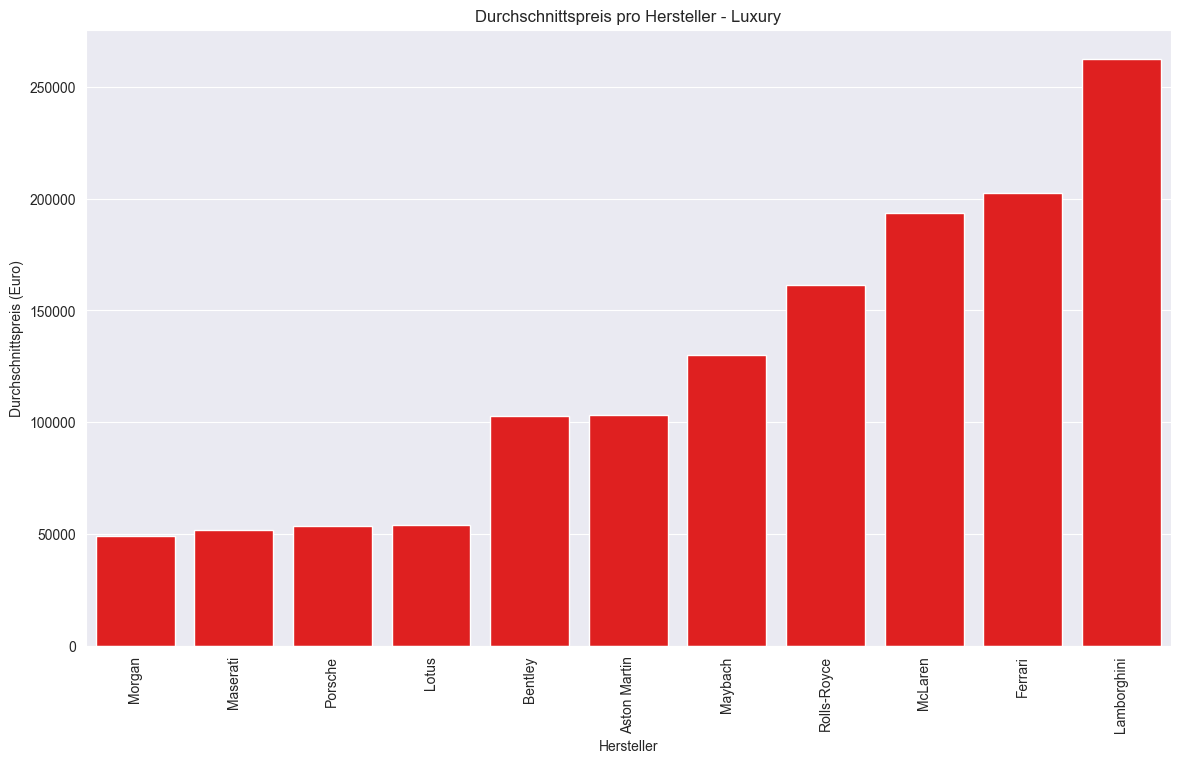

(184225, 22)


In [71]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Laden des Datensatzes mit der hinzugefügten Spalte "New_car"
file_path = 'Ad_table_with_new_car.csv'
data_filtered = pd.read_csv(file_path)

# Berechnung des Durchschnittspreises pro Hersteller
average_prices_per_maker = data_filtered.groupby('Maker')['Price'].mean().reset_index()

# Sortieren der Hersteller nach Durchschnittspreis
average_prices_per_maker = average_prices_per_maker.sort_values(by='Price')

# Grenzwerte basierend auf Morgan und Volkswagen
luxury_threshold = average_prices_per_maker[average_prices_per_maker['Maker'] == 'Morgan']['Price'].values[0]
small_threshold = average_prices_per_maker[average_prices_per_maker['Maker'] == 'Volkswagen']['Price'].values[0]

# Einteilung der Hersteller in Kategorien basierend auf den Grenzwerten
def categorize_maker(price):
    if price >= luxury_threshold:
        return 'Luxury'
    elif price < small_threshold:
        return 'Small'
    else:
        return 'Medium'

# Berechnung des Durchschnittspreises pro Hersteller mit Kategorie und Sortierung nach Preis
average_prices_per_maker['Category'] = average_prices_per_maker['Price'].apply(categorize_maker)
average_prices_per_maker = average_prices_per_maker.sort_values(by='Price')

# Kategorie zu jedem Datensatz im ursprünglichen Datensatz hinzufügen
data_filtered = pd.merge(data_filtered, average_prices_per_maker[['Maker', 'Category']], on='Maker', how='left')

# Anzeige der konkreten Durchschnittspreise pro Hersteller mit Kategorie
print("Durchschnittspreise pro Hersteller mit Kategorie:")
print(average_prices_per_maker)

# Farben für die Kategorien
palette = {'Small': 'blue', 'Medium': 'green', 'Luxury': 'red'}

# Erstellung des Balkendiagramms mit eingefärbten Kategorien
plt.figure(figsize=(14, 8))
sns.barplot(x='Maker', y='Price', hue='Category', data=average_prices_per_maker, dodge=False, palette=palette)
plt.title('Durchschnittspreis pro Hersteller nach Kategorie')
plt.xlabel('Hersteller')
plt.ylabel('Durchschnittspreis (Euro)')
plt.xticks(rotation=90)
plt.legend(title='Category')

# Deaktivieren der wissenschaftlichen Notation auf der y-Achse
plt.ticklabel_format(style='plain', axis='y')

# Speichern des Diagramms
plt.savefig('average_price_per_maker_colored.png')

# Anzeigen des Diagramms
plt.show()

# Erstellung der separaten Balkendiagramme für jede Gruppe
categories = ['Small', 'Medium', 'Luxury']
for category in categories:
    plt.figure(figsize=(14, 8))
    subset = data_filtered[data_filtered['Category'] == category]
    # Sortieren des Subsets nach Durchschnittspreis
    subset_sorted = subset.groupby('Maker')['Price'].mean().reset_index().sort_values(by='Price')
    sns.barplot(x='Maker', y='Price', data=subset_sorted, palette=[palette[category]])
    plt.title(f'Durchschnittspreis pro Hersteller - {category}')
    plt.xlabel('Hersteller')
    plt.ylabel('Durchschnittspreis (Euro)')
    plt.xticks(rotation=90)
    plt.ticklabel_format(style='plain', axis='y')

    # Speichern des Diagramms
    plt.savefig(f'average_price_per_maker_{category}.png')

    # Anzeigen des Diagramms
    plt.show()

print(data_filtered.shape)
# Speichern des aktualisierten Datensatzes in eine neue CSV-Datei
data_filtered.to_csv('Ad_table_with_groups_final.csv', index=False)
